In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import time
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [3]:
detrac_anno_folder = './DETRAC-Train-Annotations-XML-v3'
img_size = [960, 540]

In [4]:
anno_xmls = []
folder_name = []
xml_list = os.listdir(detrac_anno_folder)
for anno_xml in xml_list:
    anno_xmls.append(os.path.join(detrac_anno_folder, anno_xml))
    folder_name.append(anno_xml[:-7])
anno_xmls

['./DETRAC-Train-Annotations-XML-v3/MVI_20011_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_20012_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_20032_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_20033_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_20034_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_20035_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_20051_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_20052_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_20061_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_20062_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_20063_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_20064_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_20065_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_39761_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_39771_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_39781_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_39801_v3.xml',
 './DETRAC-Train-Annotations-XML-v3/MVI_39811_v3.xml',
 './DETRAC

In [5]:
folder_name

['MVI_20011',
 'MVI_20012',
 'MVI_20032',
 'MVI_20033',
 'MVI_20034',
 'MVI_20035',
 'MVI_20051',
 'MVI_20052',
 'MVI_20061',
 'MVI_20062',
 'MVI_20063',
 'MVI_20064',
 'MVI_20065',
 'MVI_39761',
 'MVI_39771',
 'MVI_39781',
 'MVI_39801',
 'MVI_39811',
 'MVI_39821',
 'MVI_39851',
 'MVI_39861',
 'MVI_39931',
 'MVI_40131',
 'MVI_40141',
 'MVI_40152',
 'MVI_40161',
 'MVI_40162',
 'MVI_40171',
 'MVI_40172',
 'MVI_40181',
 'MVI_40191',
 'MVI_40192',
 'MVI_40201',
 'MVI_40204',
 'MVI_40211',
 'MVI_40212',
 'MVI_40213',
 'MVI_40241',
 'MVI_40243',
 'MVI_40244',
 'MVI_40732',
 'MVI_40751',
 'MVI_40752',
 'MVI_40871',
 'MVI_40962',
 'MVI_40963',
 'MVI_40981',
 'MVI_40991',
 'MVI_40992',
 'MVI_41063',
 'MVI_41073',
 'MVI_63521',
 'MVI_63525',
 'MVI_63544',
 'MVI_63552',
 'MVI_63553',
 'MVI_63554',
 'MVI_63561',
 'MVI_63562',
 'MVI_63563']

In [19]:
def convertBox(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + (box[2] / 2.0))
    y = (box[1] + (box[3] / 2.0))
    w = box[2]
    h = box[3]
    x = x*dw
    y = y*dh
    w = w*dw
    h = h*dh
    return (x,y,w,h)

def createDir(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)

def createDFRow(identity, bbox):
    return {'class': '0',
            'identity': str(identity),
            'x_center': str(format(bbox[0],'f')),
            'y_center': str(format(bbox[1],'f')),
            'width': str(format(bbox[2],'f')),
            'height': str(format(bbox[3],'f'))}

In [20]:
%%time
out_cols = ['class', 'identity', 'x_center', 'y_center', 'width', 'height']

for idx in range(len(anno_xmls)):
    print(f'Processing: {anno_xmls[idx]}')
    root = ET.parse(anno_xmls[idx]).getroot()
    folder = folder_name[idx]
    createDir(folder)
    for frame in root:
        if (frame.tag != 'frame'):
            continue
        file_name = 'img' + frame.attrib['num'].zfill(5) + '.txt'
        out_frame = pd.DataFrame(columns=out_cols)
        for targets in frame[0]:
            id = targets.attrib['id']
            box = [float(targets[0].attrib['left']),
                   float(targets[0].attrib['top']),
                   float(targets[0].attrib['width']),
                   float(targets[0].attrib['height'])]
            bbox = convertBox(img_size, box)
            out_row = createDFRow(id, bbox)
            out_frame = out_frame.append(out_row, ignore_index=True)
        np.savetxt(os.path.join(folder, file_name), out_frame, fmt='%s')

Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_20011_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_20012_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_20032_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_20033_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_20034_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_20035_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_20051_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_20052_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_20061_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_20062_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_20063_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_20064_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_20065_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_39761_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_39771_v3.xml
Processing: ./DETRAC-Train-Annotations-XML-v3/MVI_39781

In [7]:
detrac_test = '../DETRAC/test_labels_with_ids'
test_dir = os.listdir(detrac_test)
test_folders = []
for folder in test_dir:
    test_folders.append(os.path.join(detrac_test, folder))
test_folders

['../DETRAC/test_labels_with_ids\\MVI_39031',
 '../DETRAC/test_labels_with_ids\\MVI_39051',
 '../DETRAC/test_labels_with_ids\\MVI_39211',
 '../DETRAC/test_labels_with_ids\\MVI_39271',
 '../DETRAC/test_labels_with_ids\\MVI_39311',
 '../DETRAC/test_labels_with_ids\\MVI_39361',
 '../DETRAC/test_labels_with_ids\\MVI_39371',
 '../DETRAC/test_labels_with_ids\\MVI_39401',
 '../DETRAC/test_labels_with_ids\\MVI_39501',
 '../DETRAC/test_labels_with_ids\\MVI_39511',
 '../DETRAC/test_labels_with_ids\\MVI_40701',
 '../DETRAC/test_labels_with_ids\\MVI_40711',
 '../DETRAC/test_labels_with_ids\\MVI_40712',
 '../DETRAC/test_labels_with_ids\\MVI_40714',
 '../DETRAC/test_labels_with_ids\\MVI_40742',
 '../DETRAC/test_labels_with_ids\\MVI_40743',
 '../DETRAC/test_labels_with_ids\\MVI_40761',
 '../DETRAC/test_labels_with_ids\\MVI_40762',
 '../DETRAC/test_labels_with_ids\\MVI_40763',
 '../DETRAC/test_labels_with_ids\\MVI_40771',
 '../DETRAC/test_labels_with_ids\\MVI_40772',
 '../DETRAC/test_labels_with_ids\\

In [37]:
missing_dict = {}

for folder in test_folders:
    items = os.listdir(folder)
    offset = 0
    for i in range(len(items)):
        item_index = int(items[i][3:-4])
        item_index_woffset = item_index+offset
        # print(f'i : {i}')
        # print(f'item idx : {str(item_index)}')
        # print(f'item_idx_offset: {str(item_index_woffset)}')
        if item_index_woffset != i+1:
            print(folder[-9:] + ' missing ' + str(item_index_woffset))
            if folder[-9:] not in missing_dict.keys():
                missing_dict[folder[-9:]] = []
            else:
                missing_dict[folder[-9:]].append(item_index_woffset)
            item_index += 1

87
MVI_39271 missing 688
MVI_39271 missing 689
MVI_39271 missing 690
MVI_39271 missing 691
MVI_39271 missing 692
MVI_39271 missing 693
MVI_39271 missing 694
MVI_39271 missing 695
MVI_39271 missing 696
MVI_39271 missing 697
MVI_39271 missing 698
MVI_39271 missing 699
MVI_39271 missing 700
MVI_39271 missing 701
MVI_39271 missing 702
MVI_39271 missing 703
MVI_39271 missing 704
MVI_39271 missing 705
MVI_39271 missing 706
MVI_39271 missing 707
MVI_39271 missing 708
MVI_39271 missing 709
MVI_39271 missing 710
MVI_39271 missing 711
MVI_39271 missing 712
MVI_39271 missing 713
MVI_39271 missing 714
MVI_39271 missing 715
MVI_39271 missing 716
MVI_39271 missing 717
MVI_39271 missing 718
MVI_39271 missing 719
MVI_39271 missing 720
MVI_39271 missing 721
MVI_39271 missing 722
MVI_39271 missing 723
MVI_39271 missing 724
MVI_39271 missing 725
MVI_39271 missing 726
MVI_39271 missing 727
MVI_39271 missing 728
MVI_39271 missing 729
MVI_39271 missing 730
MVI_39271 missing 731
MVI_39271 missing 732
MVI_392

In [38]:
missing_dict.keys()

dict_keys(['MVI_39051', 'MVI_39211', 'MVI_39271'])

In [39]:
missing_dict['MVI_39051']

[1062,
 1063,
 1064,
 1065,
 1066,
 1067,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1088,
 1089,
 1090,
 1091,
 1092,
 1093,
 1094,
 1095,
 1096,
 1097,
 1098,
 1099,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1113,
 1114,
 1115,
 1116,
 1117,
 1118,
 1119,
 1120]

In [40]:
missing_dict['MVI_39211']

[572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 580,
 581,
 582,
 583,
 584,
 585,
 586,
 587,
 588,
 589,
 590,
 591,
 592,
 593,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 612,
 613,
 614,
 615,
 616,
 617,
 618,
 619,
 620,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643,
 644,
 645,
 646,
 647,
 648,
 649,
 650,
 651,
 652,
 653,
 654,
 655,
 656,
 657,
 658,
 659,
 660,
 661,
 662,
 663,
 664,
 665,
 666,
 667,
 668,
 669,
 670,
 671,
 672,
 673,
 674,
 675,
 676,
 677,
 678,
 679,
 680,
 681,
 682,
 683,
 684,
 685,
 686,
 687,
 688,
 689,
 690,
 691,
 692,
 693,
 694,
 695,
 696,
 697,
 698,
 699,
 700,
 701,
 702,
 703,
 704,
 705,
 706,
 707,
 708,
 709,
 710,
 711,
 712,
 713,
 714,
 715,
 716,
 717,
 718,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 737,
 738

In [41]:
missing_dict['MVI_39271']

[82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251

In [7]:
img = cv2.imread('img00001.jpg')
img.shape

(540, 960, 3)

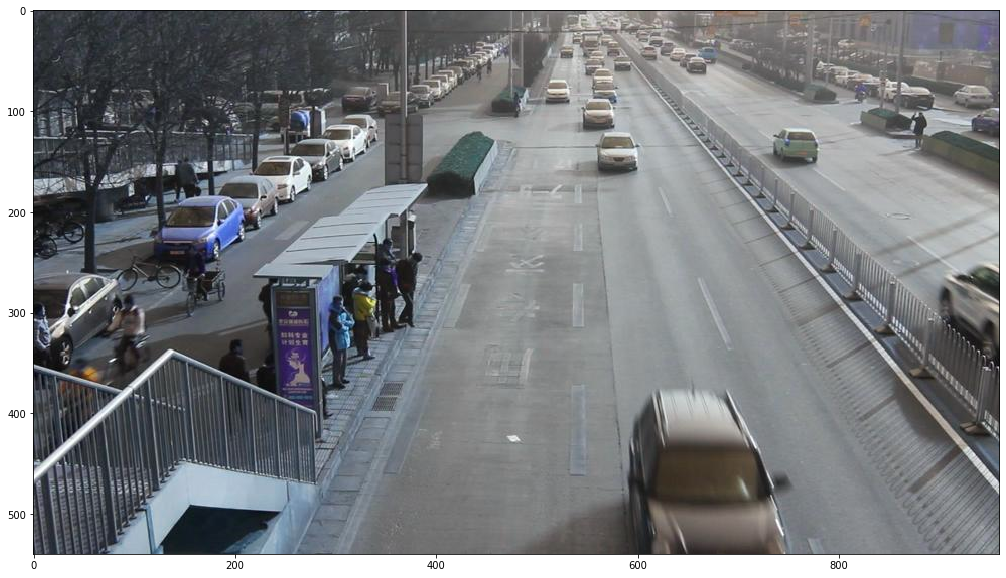

In [8]:
fig = plt.figure(figsize=(20,10))
plt.imshow(img)

In [16]:
left = 558
top = 121
width = 47
height = 43

X1 = left
Y1 = top
X2 = left + int(width/2)
Y2 = top + int(height/2)

cv2.rectangle(img,
            (X1, Y1),
            (X2, Y2),
            (255,0,0),
            2)

array([[[ 62,  64,  75],
        [ 70,  72,  83],
        [ 69,  71,  82],
        ...,
        [111, 115, 133],
        [110, 114, 132],
        [110, 114, 132]],

       [[ 64,  66,  77],
        [ 69,  71,  82],
        [ 66,  68,  79],
        ...,
        [111, 115, 133],
        [110, 114, 132],
        [110, 114, 132]],

       [[ 63,  65,  76],
        [ 64,  66,  77],
        [ 60,  62,  73],
        ...,
        [112, 116, 134],
        [111, 115, 133],
        [111, 115, 133]],

       ...,

       [[ 43,  48,  57],
        [ 43,  48,  57],
        [ 80,  85,  94],
        ...,
        [108, 113, 116],
        [111, 116, 119],
        [132, 137, 140]],

       [[ 48,  54,  61],
        [ 43,  49,  56],
        [ 76,  82,  89],
        ...,
        [117, 120, 124],
        [125, 128, 132],
        [141, 144, 148]],

       [[ 47,  53,  60],
        [ 40,  46,  53],
        [ 72,  78,  85],
        ...,
        [139, 142, 146],
        [140, 143, 147],
        [136, 139, 143]]

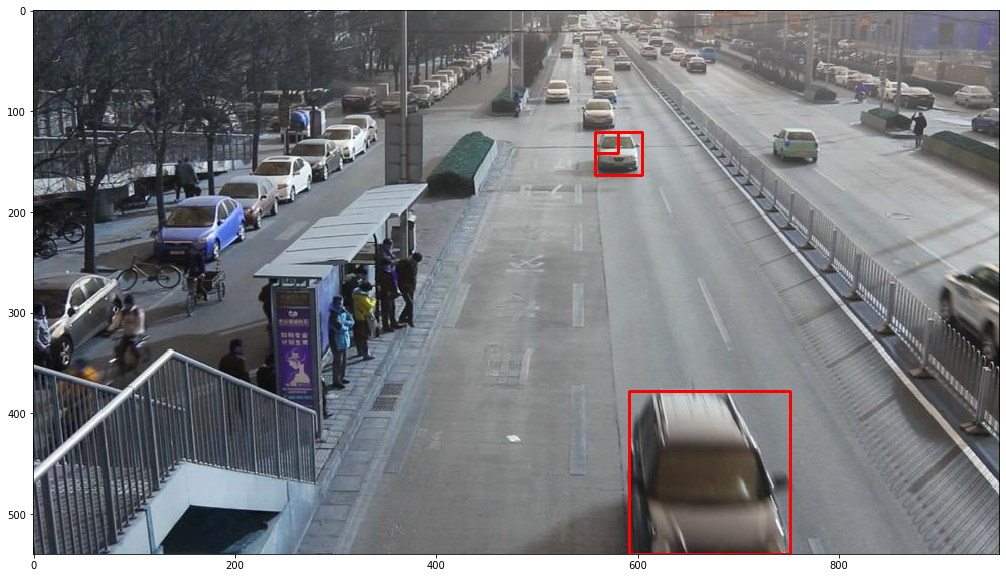

In [17]:
fig = plt.figure(figsize=(20,10))
plt.imshow(img)